# Test Load Model
https://www.dropbox.com/s/3ejl39hoqpdfla9/1_InceptionV3.zip?dl=0

https://www.dropbox.com/s/v5ghg48pb8ge219/1_InceptionV3.h5?dl=0

In [ ]:
!wget --no-check-certificate "https://www.dropbox.com/s/3ejl39hoqpdfla9/1_InceptionV3.zip?dl=0"
!unzip 1_InceptionV3.zip?dl=0

In [ ]:
from keras.models import load_model
import tensorflow as tf

link_model = "/content/1_InceptionV3.h5"
model = tf.keras.models.load_model(link_model)
model.summary()

## class indices

In [ ]:
class_indices = dict({('apple_pie', 0), ('baby_back_ribs', 1), ('baklava', 2), ('bread_pudding', 3), ('breakfast_burrito', 4), ('bruschetta', 5), ('caesar_salad', 6), ('caprese_salad', 7), ('carrot_cake', 8), ('cheesecake', 9), ('chicken_curry', 10), ('chicken_quesadilla', 11), ('chicken_wings', 12), ('chocolate_cake', 13), ('chocolate_mousse', 14), ('churros', 15), ('clam_chowder', 16), ('crab_cakes', 17), ('creme_brulee', 18), ('deviled_eggs', 19), ('donuts', 20), ('dumplings', 21), ('edamame', 22), ('falafel', 23), ('french_fries', 24), ('french_onion_soup', 25), ('french_toast', 26), ('frozen_yogurt', 27), ('garlic_bread', 28), ('gnocchi', 29), ('greek_salad', 30), ('grilled_salmon', 31), ('guacamole', 32), ('hamburger', 33), ('hot_dog', 34), ('huevos_rancheros', 35), ('hummus', 36), ('ice_cream', 37), ('lasagna', 38), ('lobster_bisque', 39), ('macaroni_and_cheese', 40), ('miso_soup', 41), ('mussels', 42), ('onion_rings', 43), ('pad_thai', 44), ('paella', 45), ('pancakes', 46), ('pizza', 47), ('ramen', 48), ('ravioli', 49), ('red_velvet_cake', 50), ('risotto', 51), ('scallops', 52), ('seaweed_salad', 53), ('spaghetti_bolognese', 54), ('spring_rolls', 55), ('strawberry_shortcake', 56), ('tiramisu', 57), ('waffles', 58)})
print(class_indices)

{'frozen_yogurt': 27, 'dumplings': 21, 'guacamole': 32, 'churros': 15, 'edamame': 22, 'caprese_salad': 7, 'french_fries': 24, 'garlic_bread': 28, 'falafel': 23, 'carrot_cake': 8, 'bread_pudding': 3, 'french_toast': 26, 'hamburger': 33, 'lobster_bisque': 39, 'baklava': 2, 'red_velvet_cake': 50, 'waffles': 58, 'chocolate_mousse': 14, 'crab_cakes': 17, 'onion_rings': 43, 'greek_salad': 30, 'mussels': 42, 'clam_chowder': 16, 'french_onion_soup': 25, 'paella': 45, 'ravioli': 49, 'chicken_wings': 12, 'scallops': 52, 'spring_rolls': 55, 'huevos_rancheros': 35, 'bruschetta': 5, 'risotto': 51, 'seaweed_salad': 53, 'apple_pie': 0, 'chocolate_cake': 13, 'macaroni_and_cheese': 40, 'lasagna': 38, 'pad_thai': 44, 'caesar_salad': 6, 'ice_cream': 37, 'breakfast_burrito': 4, 'cheesecake': 9, 'pizza': 47, 'ramen': 48, 'tiramisu': 57, 'donuts': 20, 'chicken_curry': 10, 'deviled_eggs': 19, 'hot_dog': 34, 'chicken_quesadilla': 11, 'pancakes': 46, 'strawberry_shortcake': 56, 'hummus': 36, 'miso_soup': 41, '

In [ ]:
def label_name(label_index):
  for name, label in class_indices.items():
    if label == label_index:
      return name

Saving 1019389.jpg to 1019389 (2).jpg
Prediction ['garlic_bread', 'waffles', 'miso_soup']


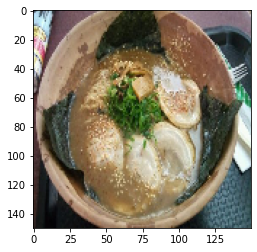

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

top3_prediction = []
for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images)
  y_pred_index = np.argsort(classes[0])[-3:]
  for name in y_pred_index:
    predict = label_name(name)
    top3_prediction.append(predict)
  
  print("Prediction", top3_prediction)
  plt.imshow(img)
 

## retrieve nutrition value

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gabrielilharco/snap-n-eat/master/data/nutrition_values.csv'
nutrition_values = pd.read_csv(url)
nutrition_values['product'] = nutrition_values['product_name'].replace(' ', '_', regex=True)

def nutrition_info(food_label):
  
  info_nutrition = nutrition_values[nutrition_values["product"] == name]
  json = info_nutrition.to_dict(orient='records')[0]

  return json

In [ ]:
nutrition_info('miso_soup')

{'carbohydrates_100g': 44.73000000000001,
 'cholesterol_100g': 0.0007500000000000001,
 'energy_100g': 334.65975,
 'fat_100g': 13.585,
 'fiber_100g': 2.641666666666667,
 'product': 'garlic_bread',
 'product_name': 'garlic bread',
 'proteins_100g': 8.228333333333332,
 'sugars_100g': 1.65}